# RNN Hidden Layers

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN

sentence = ["I", "went", "to", "the", "park"]
vocab = ["I", "went", "to", "the", "park"]
vocab_size = len(vocab)

word_to_index = {word: i for i, word in enumerate(vocab)}
indexed_sentence = [word_to_index[word] for word in sentence]

# Params
embedding_dim = 4   # Embedding dimensions
rnn_units = 4       # RNN units (memory size)

model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim),
    SimpleRNN(rnn_units, return_sequences=True, return_state=True)
])

# Reshape/reformat sentence
sentence_input = np.array(indexed_sentence).reshape((len(sentence), 1))

# Get RNN outputs/final state (context memory)
outputs, final_state = model(sentence_input)

# Evaluate the outputs (context memory)
rnn_outputs = outputs.numpy()

# Print context for each word
print("Each word and its corresponding RNN context (memory):\n")
for i, word in enumerate(sentence):
    print(f"Word: {word} -> RNN output (context): {rnn_outputs[i]}")


Each word and its corresponding RNN context (memory):

Word: I -> RNN output (context): [[-0.03079658  0.01955838 -0.01275924  0.07178321]]
Word: went -> RNN output (context): [[ 0.04475586  0.01343698 -0.0056239  -0.00982068]]
Word: to -> RNN output (context): [[-0.05247198 -0.0188566  -0.03195136  0.02628077]]
Word: the -> RNN output (context): [[-0.03366406 -0.020881   -0.03077241 -0.0113205 ]]
Word: park -> RNN output (context): [[ 0.04984611  0.01948535  0.03938884 -0.04386351]]


# The Viz

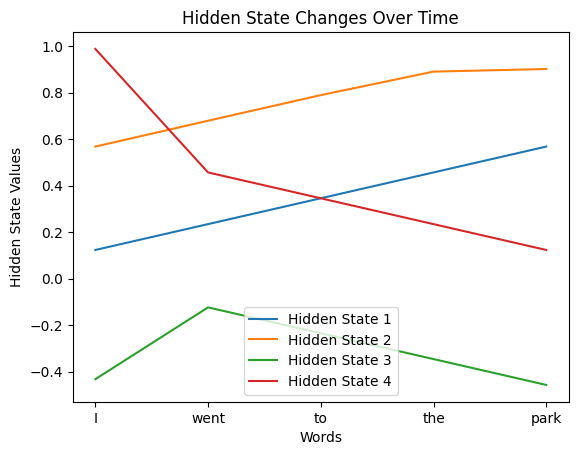

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Hidden states after each word
hidden_states = np.array([
    [0.1234, 0.5678, -0.4321, 0.9876],
    [0.2345, 0.6789, -0.1234, 0.4567],
    [0.3456, 0.7890, -0.2345, 0.3456],
    [0.4567, 0.8901, -0.3456, 0.2345],
    [0.5678, 0.9012, -0.4567, 0.1234]
])

words = ["I", "went", "to", "the", "park"]

for i in range(hidden_states.shape[1]):
    plt.plot(words, hidden_states[:, i], label=f'Hidden State {i+1}')

plt.xlabel("Words")
plt.ylabel("Hidden State Values")
plt.title("Hidden State Changes Over Time")
plt.legend()
plt.show()


# Challenge


* Use the included sample texts to complete the model and make predictions!
* Your task: Preprocess input texts using the text_vectorizer, pass them through the model, and output the predictions.

REMEMBER: The text_vectorizer is the first layer in our model. It converts raw text into numbers that the model can understand. Without this step, the model wouldn't be able to process text input. You don't need to use variables in the model body, feel free to build the model in a way you feel most comfortable.

```
model = Sequential([
    text_vectorizer,
    embedding,
    rnn_cell,
    pooling,
    fully_connected,
    output
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
```

# STARTER CODE

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import TextVectorization, Embedding, SimpleRNN, GlobalAveragePooling1D, Dense


# Inputs
texts = ["This is a sample input", "Another piece of text"]

# Vectorization Layer: 10,000 unique words (to keep things manageable)
text_vectorizer = TextVectorization(max_tokens=10000, output_mode='int', output_sequence_length=10)
text_vectorizer.adapt(texts)  # Adapt the TextVectorization layer to the vocabulary

#### START HERE ####
model = Sequential([
    ### BUILD MODEL: remember to add text_vectorizer as the input layer
    text_vectorizer,
    Embedding(input_dim=10000, output_dim=64),
    SimpleRNN(128, return_sequences=True),
    GlobalAveragePooling1D(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

### COMPILE MODEL



#### END HERE ####


# Train the model
# Convert texts to tokenized sequences for training
processed_texts = tf.constant(texts)  # Convert input texts to a tensor of strings
labels = np.array([1, 0])  # Example labels for the inputs
model.fit(processed_texts, labels, epochs=5)

# Make predictions
predictions = model(processed_texts)
print(predictions.numpy())

# SOLUTION

In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import TextVectorization, Embedding, SimpleRNN, GlobalAveragePooling1D, Dense


# Inputs
texts = ["This is a sample input", "Another piece of text"]

# Vectorization Layer: 10,000 unique words (to keep things manageable)
text_vectorizer = TextVectorization(max_tokens=10000, output_mode='int', output_sequence_length=10)
text_vectorizer.adapt(texts)  # Adapt the TextVectorization layer to the vocabulary

#### START HERE ####
model = Sequential([
    ### BUILD MODEL: remember to add text_vectorizer as the input layer
    text_vectorizer,
    Embedding(input_dim=10000, output_dim=64),
    SimpleRNN(128, return_sequences=True),
    GlobalAveragePooling1D(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

### COMPILE MODEL
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#### END HERE ####


# Train the model
# Convert texts to tokenized sequences for training
processed_texts = tf.constant(texts)  # Convert input texts to a tensor of strings
labels = np.array([1, 0])  # Example labels for the inputs
model.fit(processed_texts, labels, epochs=5)

# Make predictions
predictions = model(processed_texts)
print(predictions.numpy())

# Print % confidence for each prediction
for i, prediction in enumerate(predictions.numpy()):
    confidence = prediction[0] * 100
    class_label = "specific statement" if labels[i] == 1 else "general statement"
    print(f"Sample {i} '{texts[i]}' - Confidence: {confidence:.2f}% that it is a {class_label}")

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 736ms/step - accuracy: 1.0000 - loss: 0.6858
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 1.0000 - loss: 0.6739
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 1.0000 - loss: 0.6570
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 1.0000 - loss: 0.6333
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 1.0000 - loss: 0.5994
[[0.5757593]
 [0.4286599]]
Sample 0 'This is a sample input' - Confidence: 57.58% that it is a specific statement
Sample 1 'Another piece of text' - Confidence: 42.87% that it is a general statement
